In [1]:
import functions_framework
from auxiliary_functions import *
import datetime
import pytz
import os
import regex as re
import matplotlib.pyplot as plt

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/home/jupyter/ficc/isaac_creds.json"
%load_ext autoreload
%autoreload 2

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
fs = gcsfs.GCSFileSystem(project='eng-reactor-287421')

In [5]:
x, y = get_trade_messages('gs://msrb_intraday_real_time_trade_files/real_time_msrb_file_2023-07-05_14:48:02.json' , fs)

Getting trade messages
Trade messages loaded
Processing 237 trade messages


In [7]:
y

['2023070505862700']

In [6]:
for k, v in x.items():
    if v['transaction_type'] == 'C':
        print(k,v)
        break

In [8]:
with fs.open("gs://biases/trade_log_2023-07-05.pkl", 'rb') as f:
    trades_df = pickle.load(f)

In [13]:
trades_df

,trade_date,trade_datetime,published_datetime,trade_type,transaction_type,cusip,par_traded,yield,prediction,error
2023070500000200,2023-07-05,2023-07-05 06:00:01,2023-07-05 06:45:15,S,I,10607UEU9,20000.0,4.249,4.264100,0.015100
2023070500014300,2023-07-03,2023-07-03 09:30:47,2023-07-05 06:45:18,S,I,717893W72,4475000.0,4.050,4.042988,-0.007012
2023070500026000,2023-07-05,2023-07-05 07:29:27,2023-07-05 07:30:30,S,I,0331618F0,45000.0,3.779,3.302660,-0.476340
2023070500025900,2023-07-05,2023-07-05 07:29:27,2023-07-05 07:30:30,D,I,0331618F0,45000.0,3.779,3.474005,-0.304995
2023070500026400,2023-07-05,2023-07-05 07:31:36,2023-07-05 07:31:53,S,I,094171GW9,20000.0,3.802,3.304344,-0.497656
...,...,...,...,...,...,...,...,...,...,...
2023070510143800,2023-07-05,2023-07-05 15:10:59,2023-07-05 15:11:52,D,I,986040AE3,55000.0,2.860,2.863741,0.003741
2023070510150200,2023-07-05,2023-07-05 15:11:48,2023-07-05 15:11:55,P,I,01757LFP6,25000.0,3.829,3.811224,-0.017776
2023070510150500,2023-07-05,2023-07-05 15:11:28,2023-07-05 15:12:02,D,I,355856ND3,250000.0,2.855,3.005685,0.150685
2023070510150800,2023-07-05,2023-07-05 15:11:44,2023-07-05 15:12:02,D,I,650036DL7,50000.0,4.102,4.105428,0.003428


In [12]:
trades_df.drop(y)

,trade_date,trade_datetime,published_datetime,trade_type,transaction_type,cusip,par_traded,yield,prediction,error
2023070500000200,2023-07-05,2023-07-05 06:00:01,2023-07-05 06:45:15,S,I,10607UEU9,20000.0,4.249,4.264100,0.015100
2023070500014300,2023-07-03,2023-07-03 09:30:47,2023-07-05 06:45:18,S,I,717893W72,4475000.0,4.050,4.042988,-0.007012
2023070500026000,2023-07-05,2023-07-05 07:29:27,2023-07-05 07:30:30,S,I,0331618F0,45000.0,3.779,3.302660,-0.476340
2023070500025900,2023-07-05,2023-07-05 07:29:27,2023-07-05 07:30:30,D,I,0331618F0,45000.0,3.779,3.474005,-0.304995
2023070500026400,2023-07-05,2023-07-05 07:31:36,2023-07-05 07:31:53,S,I,094171GW9,20000.0,3.802,3.304344,-0.497656
...,...,...,...,...,...,...,...,...,...,...
2023070510143800,2023-07-05,2023-07-05 15:10:59,2023-07-05 15:11:52,D,I,986040AE3,55000.0,2.860,2.863741,0.003741
2023070510150200,2023-07-05,2023-07-05 15:11:48,2023-07-05 15:11:55,P,I,01757LFP6,25000.0,3.829,3.811224,-0.017776
2023070510150500,2023-07-05,2023-07-05 15:11:28,2023-07-05 15:12:02,D,I,355856ND3,250000.0,2.855,3.005685,0.150685
2023070510150800,2023-07-05,2023-07-05 15:11:44,2023-07-05 15:12:02,D,I,650036DL7,50000.0,4.102,4.105428,0.003428


In [11]:
trades_df.transaction_type.value_counts()

I    40984
M      101
C       59
Name: transaction_type, dtype: int64

In [16]:
### FUNCTIONS TO PERFORM DEBIASING
def calculate_weighted_average(data, weighting_col, error_col, method = 'default', mask_large = None):
    '''Calculates weighted average of error_col based on weighting_col AND masks trades less than X seconds ago. 
    
    If weighted average is to be calculated based on error magnitude, weighting_col should be set to error_col. 
    Different ways of calculating the weighted average are dictated by the method keyword argument.
    By default, trades less than 60 seconds ago are not used to estimate biases. 
    '''
    
    data = data.iloc[:-1] 
    print(len(data))
    if len(data) == 0: return 0 

    errors = data[error_col].to_numpy()
    weights = data[weighting_col].to_numpy()
    
    if method == 'simple_average':
        weights = np.ones(len(errors))

    if method == 'default':
        #if method is default, weights are left as is 
        pass

    if method == 'reciprocal':
        #this gives larger weight to small errors and for large errors, should disregard them almost entirely 
        weights = np.abs(1/weights)

    if method == 'log':
        #this moderates large errors
        weights = np.log(np.abs(weights) + 1)

    if method == 'log_reciprocal':
        #this gives larger weight to small errors but sets also moderates how much extremely small errors can be weighted 
        weights = np.log(np.abs(1/weights)) 

    if mask_large:
        #this gives larger weight to small errors but sets also moderates how much extremely small errors can be weighted 
        weights = np.where(np.abs(errors) <= mask_large, weights, 0) 
    try:
        #try to calculate the average, if not possible then it means that the masked errors are all zero.
        return np.average(errors, weights=weights)
    except: 
        return 0 

def simulate_weighted_average(df, weighting_col, error_col, groupby_cols = ['trade_date'], window_size = 2000, weighting_method = 'default', mask_large = 35):
    '''Simulates debiasing procedure in production by calculating rolling average bias AND masks trades less than X seconds ago. 
    
    Window_size dictates the N preceding trades to estimate bias correction for each row. 
    Setting window_size larger than the dataframe is equivalent to using pd.expanding(). 
    '''
    
    subset = [weighting_col, error_col, 'published_datetime']
    if weighting_col == error_col:  subset.remove(error_col) #if we are weigthing by the error column then don't slice the column twice
    
    if window_size > len(df): window_size = len(df)
    groupby_dfs = list(df[subset].rolling(window_size, min_periods = 1, method='table'))
    
    biases = []
    
    if mask_large:
        print(f'Ignoring trades with errors larger than {mask_large}bps in bias correction calculations.')
    for sub_df in groupby_dfs:
        biases.append(calculate_weighted_average(sub_df, weighting_col, error_col, method = weighting_method, mask_large = mask_large))
    
    return biases 

In [17]:
simulate_weighted_average(trades_df, 
                                         weighting_col = 'error', 
                                         error_col = 'error', 
                                         groupby_cols=['trade_date'], 
                                         window_size=2000, 
                                         weighting_method='simple_average', 
                                         mask_large=0.3)

Ignoring trades with errors larger than 0.3bps in bias correction calculations.
0
1


ZeroDivisionError: Weights sum to zero, can't be normalized

In [117]:
def get_all_files_in_bucket(bucket):
    ls = storage_client.list_blobs(bucket)
    files = []
    for file in ls:
        files.append(file.name)
    return files

def debias_constant(pred, truth, bias_correction):
    corrected_pred = pred - bias_correction
    print(f'Original bias: {np.mean(pred-truth):.2f}, Original MAE: {mean_absolute_error(pred, truth):.2f}, Corrected bias: {np.mean(corrected_pred-truth):.2f}, Corrected MAE: {mean_absolute_error(corrected_pred, truth):.2f}')

In [68]:
ls = get_all_files_in_bucket('biases')

In [176]:
with fs.open("biases/trade_log_2023-06-22.pkl", "rb") as f: 
    trades_df = pickle.load(f)
trades_df['yield'] = trades_df['yield'] * 100
trades_df['prediction'] = trades_df['prediction'] * 100
trades_df['error'] = trades_df['error'] * 100
trades_df['quantity'] = np.log10(trades_df['par_traded'])

trades_df['trade_datetime'] = pd.to_datetime(trades_df['trade_datetime'])
trades_df.sort_values(by='trade_datetime', ascending=True, inplace=True)
trades_df = trades_df[trades_df['trade_datetime'].dt.date >= datetime.datetime.now().date()]
trades_df = trades_df.dropna()
trades_df = trades_df.sort_values(by='trade_datetime', ascending=True)

In [178]:
trades_df.sort_values(by='error')

,trade_date,trade_datetime,published_datetime,trade_type,transaction_type,cusip,par_traded,yield,prediction,error,quantity
2023062211148600,2023-06-22,2023-06-22 15:57:19,2023-06-22 15:58:05,D,I,70869PGQ4,20000.0,8474.8,448.164575,-8026.635425,4.301030
2023062201772900,2023-06-22,2023-06-22 10:15:29,2023-06-22 10:23:22,P,I,544351QM4,25000.0,7230.2,470.301568,-6759.898432,4.397940
2023062203362200,2023-06-22,2023-06-22 11:20:47,2023-06-22 11:21:32,D,I,97712DXB7,10000.0,2392.3,550.262175,-1842.037825,4.000000
2023062203486400,2023-06-22,2023-06-22 11:20:47,2023-06-22 11:25:21,D,I,97712DXB7,10000.0,2392.3,550.297167,-1842.002833,4.000000
2023062203380000,2023-06-22,2023-06-22 11:20:47,2023-06-22 11:21:31,S,I,97712DXB7,10000.0,2038.9,503.979888,-1534.920112,4.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023062207331200,2023-06-22,2023-06-22 13:29:32,2023-06-22 13:34:17,P,I,673475CB3,35000.0,-3499.0,-19.932337,3479.067663,4.544068
2023062209342700,2023-06-22,2023-06-22 14:46:35,2023-06-22 14:46:42,S,I,544358WR1,895000.0,-4171.0,-146.576470,4024.423530,5.951823
2023062209342300,2023-06-22,2023-06-22 14:46:34,2023-06-22 14:46:42,S,I,544358WR1,300000.0,-4171.0,-144.770562,4026.229438,5.477121
2023062209342400,2023-06-22,2023-06-22 14:46:34,2023-06-22 14:46:42,S,I,544358WR1,100000.0,-4171.0,-138.769402,4032.230598,5.000000


In [172]:
with fs.open("biases/trade_log_2023-06-22.pkl", "rb") as f: 
    trades_df = pickle.load(f)
trades_df['yield'] = trades_df['yield'] * 100
trades_df['prediction'] = trades_df['prediction'] * 100
trades_df['error'] = trades_df['error'] * 100
trades_df['quantity'] = np.log10(trades_df['par_traded'])

trades_df['trade_datetime'] = pd.to_datetime(trades_df['trade_datetime'])
trades_df.sort_values(by='trade_datetime', ascending=True, inplace=True)
trades_df = trades_df[trades_df['trade_datetime'].dt.date >= datetime.datetime.now().date()]
trades_df = trades_df.dropna()
trades_df = trades_df.sort_values(by='trade_datetime', ascending=True)
trades_df = trades_df[par_traded > 10000]
trades_df

In [197]:
from modules.ficc.utils.diff_in_days import *

In [213]:
%%time

redis_client = redis.Redis(host='10.14.140.37', port=6379, db=0)
exclude_cusips = []
for cusip in trades_df.cusip: 
    data = pickle.loads(redis_client.get(cusip))
    if data.is_called:
        exclude_cusips.append(cusip)
        continue
    if data.next_call_date:
        if diff_in_days_two_dates(data.next_call_date, datetime.datetime.now().date()) > 400:
            exclude_cusips.append(cusip)
            continue
    # if data.sink_indicator:
    #     exclude_cusips.append(cusip)
    #     continue
    if data.incorporated_state_code == 'VI':
        exclude_cusips.append(cusip)
        continue
    if data.coupon_type != 8:
        exclude_cusips.append(cusip)
        continue

CPU times: user 29.9 s, sys: 2 s, total: 31.9 s
Wall time: 12min 6s


In [229]:
%time redis_data = get_data_from_redis(trades_df.cusip.tolist())
redis_data = redis_data[0]

CPU times: user 39.5 s, sys: 3.23 s, total: 42.8 s
Wall time: 12min 16s


In [281]:
redis_data_filtered = redis_data[~redis_data.is_called.astype(bool)]

call_dates = redis_data_filtered[redis_data_filtered.is_callable].next_call_date.apply(lambda x: diff_in_days_two_dates(x, datetime.datetime.now().date()))
call_dates = call_dates.index[call_dates < 400].values
redis_data_filtered = redis_data_filtered.drop(call_dates)

In [ ]:
redis_data_filtered[redis_data_filtered.is_callable].next_call_date.apply(lambda x: diff_in_days_two_dates(x, datetime.datetime.now().date()))

In [ ]:
redis_data_filtered['days_to_call'] 

In [288]:
redis_data_filtered.filter(regex='settlement')

,primary_market_settlement_date,settlement_type
0,2023-02-23,2
1,2020-03-25,2
2,2019-09-12,2
5,2019-09-12,2
6,2017-12-14,2
...,...,...
20502,2022-09-15,2
20503,2018-03-13,2
20504,2018-03-13,2
20505,2017-09-27,2


In [285]:
df = redis_data_filtered

In [286]:
np.log10(1 + (df.maturity_date - df.settlement_date).dt.days).fillna(0)

AttributeError: 'DataFrame' object has no attribute 'settlement_date'

In [ ]:
df.loc[:, 'days_to_maturity'] =  np.log10(1 + (df.maturity_date - df.settlement_date).dt.days).fillna(0)
df.loc[:, 'days_to_call'] = np.log10(1 + (df.next_call_date - df.settlement_date).dt.days).fillna(0)
df.loc[:, 'days_to_refund'] = np.log10(1 + (df.refund_date - df.settlement_date).dt.days).fillna(0)
df.loc[:, 'days_to_par'] = np.log10(1 + (df.par_call_date - df.settlement_date).dt.days).fillna(0)
df.loc[:, 'call_to_maturity'] = np.log10(1 + (df.maturity_date - df.next_call_date).dt.days).fillna(0)

In [ ]:
data = data[(data.days_to_call == 0) | (data.days_to_call > np.log10(400))]
data = data[(data.days_to_refund == 0) | (data.days_to_refund > np.log10(400))]
data = data[(data.days_to_maturity == 0) | (data.days_to_maturity > np.log10(400))]
data = data[data.days_to_maturity < np.log10(30000)]


In [284]:
redis_data_filtered.filter(regex='coupon')

,coupon,has_zero_coupons,coupon_type,current_coupon_rate,first_coupon_date,next_coupon_payment_date,odd_first_coupon_date,previous_coupon_payment_date
0,4.0,False,17,4.0,2023-09-01,2023-09-01,NaT,NaT
1,5.0,False,8,5.0,2020-07-01,2023-07-01,NaT,2023-01-01
2,3.0,False,8,3.0,2019-12-01,2023-12-01,NaT,2023-06-01
5,3.0,False,8,3.0,2019-12-01,2023-12-01,NaT,2023-06-01
6,3.587,False,8,3.587,2018-07-01,2023-07-01,NaT,2023-01-01
...,...,...,...,...,...,...,...,...
20502,4.0,False,17,4.0,2023-03-01,2023-09-01,NaT,2023-03-01
20503,4.0,False,8,4.0,2018-09-01,2023-09-01,NaT,2023-03-01
20504,4.0,False,8,4.0,2018-09-01,2023-09-01,NaT,2023-03-01
20505,5.0,False,8,5.0,2018-05-15,2023-11-15,NaT,2023-05-15


In [216]:
trades_df_filtered = trades_df[~trades_df.cusip.isin(exclude_cusips)]

In [218]:
trades_df.error.quantile(.05), trades_df.error.quantile(.95)

(-45.70351131669707, 31.376540322575362)

In [219]:
trades_df_filtered.error.quantile(.05), trades_df_filtered.error.quantile(.95)

(-52.11247362038254, 36.38028928776128)

In [221]:
window = 1000
mask_large = 40
biases_simple = simulate_weighted_average(trades_df_filtered, 'error', 'error', weighting_method='simple_average', mask_large = mask_large, window_size=window)
biases_quantity = simulate_weighted_average(trades_df_filtered, 'quantity', 'error', weighting_method='default', mask_large = mask_large, window_size=window)

debias_series(trades_df_filtered['prediction'], trades_df_filtered['yield'], bias_warm_start(biases_simple, 50))
debias_series(trades_df_filtered['prediction'], trades_df_filtered['yield'], bias_warm_start(biases_quantity, 50))

Ignoring trades with errors larger than 40bps in bias correction calculations.
Ignoring trades with errors larger than 40bps in bias correction calculations.
Original bias: 2.341, Original MAE: 27.544, Corrected bias: 0.445, Corrected MAE: 27.624
Original bias: 2.341, Original MAE: 27.544, Corrected bias: 0.259, Corrected MAE: 27.661


In [174]:
window = 100
mask_large = 40
biases_simple = simulate_weighted_average(trades_df, 'error', 'error', weighting_method='simple_average', mask_large = mask_large, window_size=window)
biases_quantity = simulate_weighted_average(trades_df, 'quantity', 'error', weighting_method='default', mask_large = mask_large, window_size=window)
a
debias_series(trades_df['prediction'], trades_df['yield'], bias_warm_start(biases_simple, 50))
debias_series(trades_df['prediction'], trades_df['yield'], bias_warm_start(biases_quantity, 50))

Ignoring trades with errors larger than 40bps in bias correction calculations.
Ignoring trades with errors larger than 40bps in bias correction calculations.
Original bias: -4.695, Original MAE: 16.149, Corrected bias: -6.358, Corrected MAE: 16.038
Original bias: -4.695, Original MAE: 16.149, Corrected bias: -6.398, Corrected MAE: 16.039


In [175]:
window = 2000
mask_large = 40
biases_simple = simulate_weighted_average(trades_df, 'error', 'error', weighting_method='simple_average', mask_large = mask_large, window_size=window)
biases_quantity = simulate_weighted_average(trades_df, 'quantity', 'error', weighting_method='default', mask_large = mask_large, window_size=window)

debias_series(trades_df['prediction'], trades_df['yield'], bias_warm_start(biases_simple, 50))
debias_series(trades_df['prediction'], trades_df['yield'], bias_warm_start(biases_quantity, 50))

Ignoring trades with errors larger than 40bps in bias correction calculations.
Ignoring trades with errors larger than 40bps in bias correction calculations.
Original bias: -4.695, Original MAE: 16.149, Corrected bias: -6.399, Corrected MAE: 16.199
Original bias: -4.695, Original MAE: 16.149, Corrected bias: -6.499, Corrected MAE: 16.216


<AxesSubplot:xlabel='trade_datetime'>

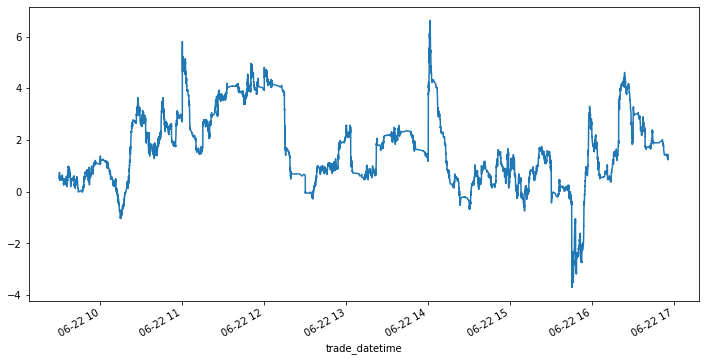

In [116]:
temp = trades_df[['trade_datetime']]
temp['trade_time'] = pd.to_datetime(temp['trade_datetime']).dt.time
temp['bias'] = biases_simple
temp = temp.set_index('trade_datetime')
temp.loc['2023-06-22 09:30':].bias.plot(figsize=(12,6))

<AxesSubplot:xlabel='trade_datetime'>

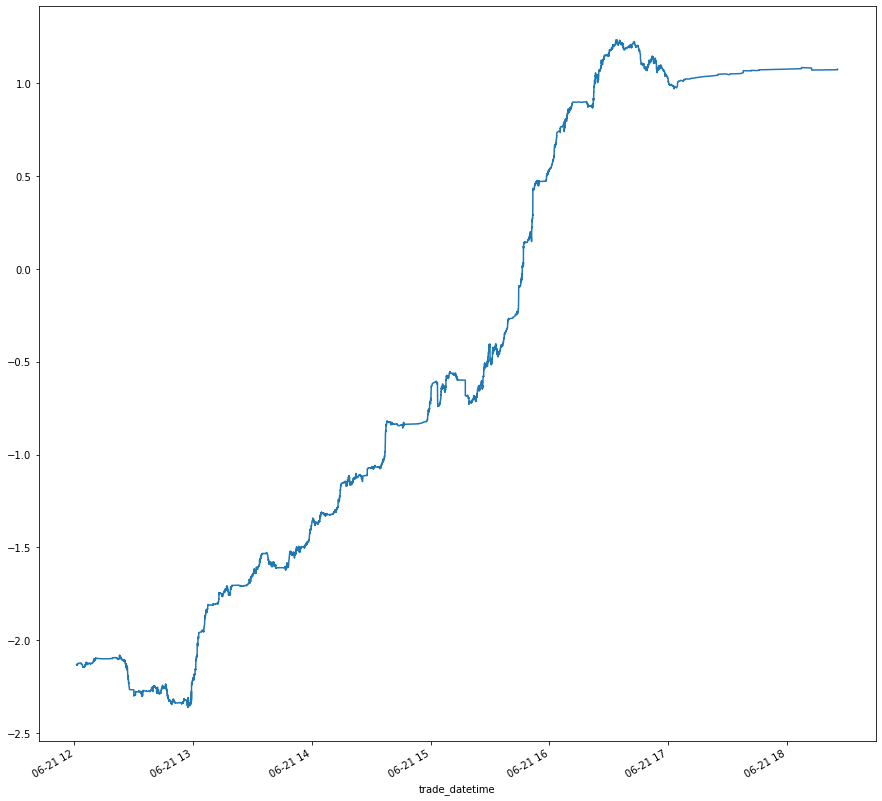

In [182]:
trades_df['masked_error'] = np.where(np.abs(trades_df['error']) <= 30, trades_df['error'], 0)
trades_df.set_index('trade_datetime').masked_error.rolling(5000).mean().plot(figsize=(15, 15))

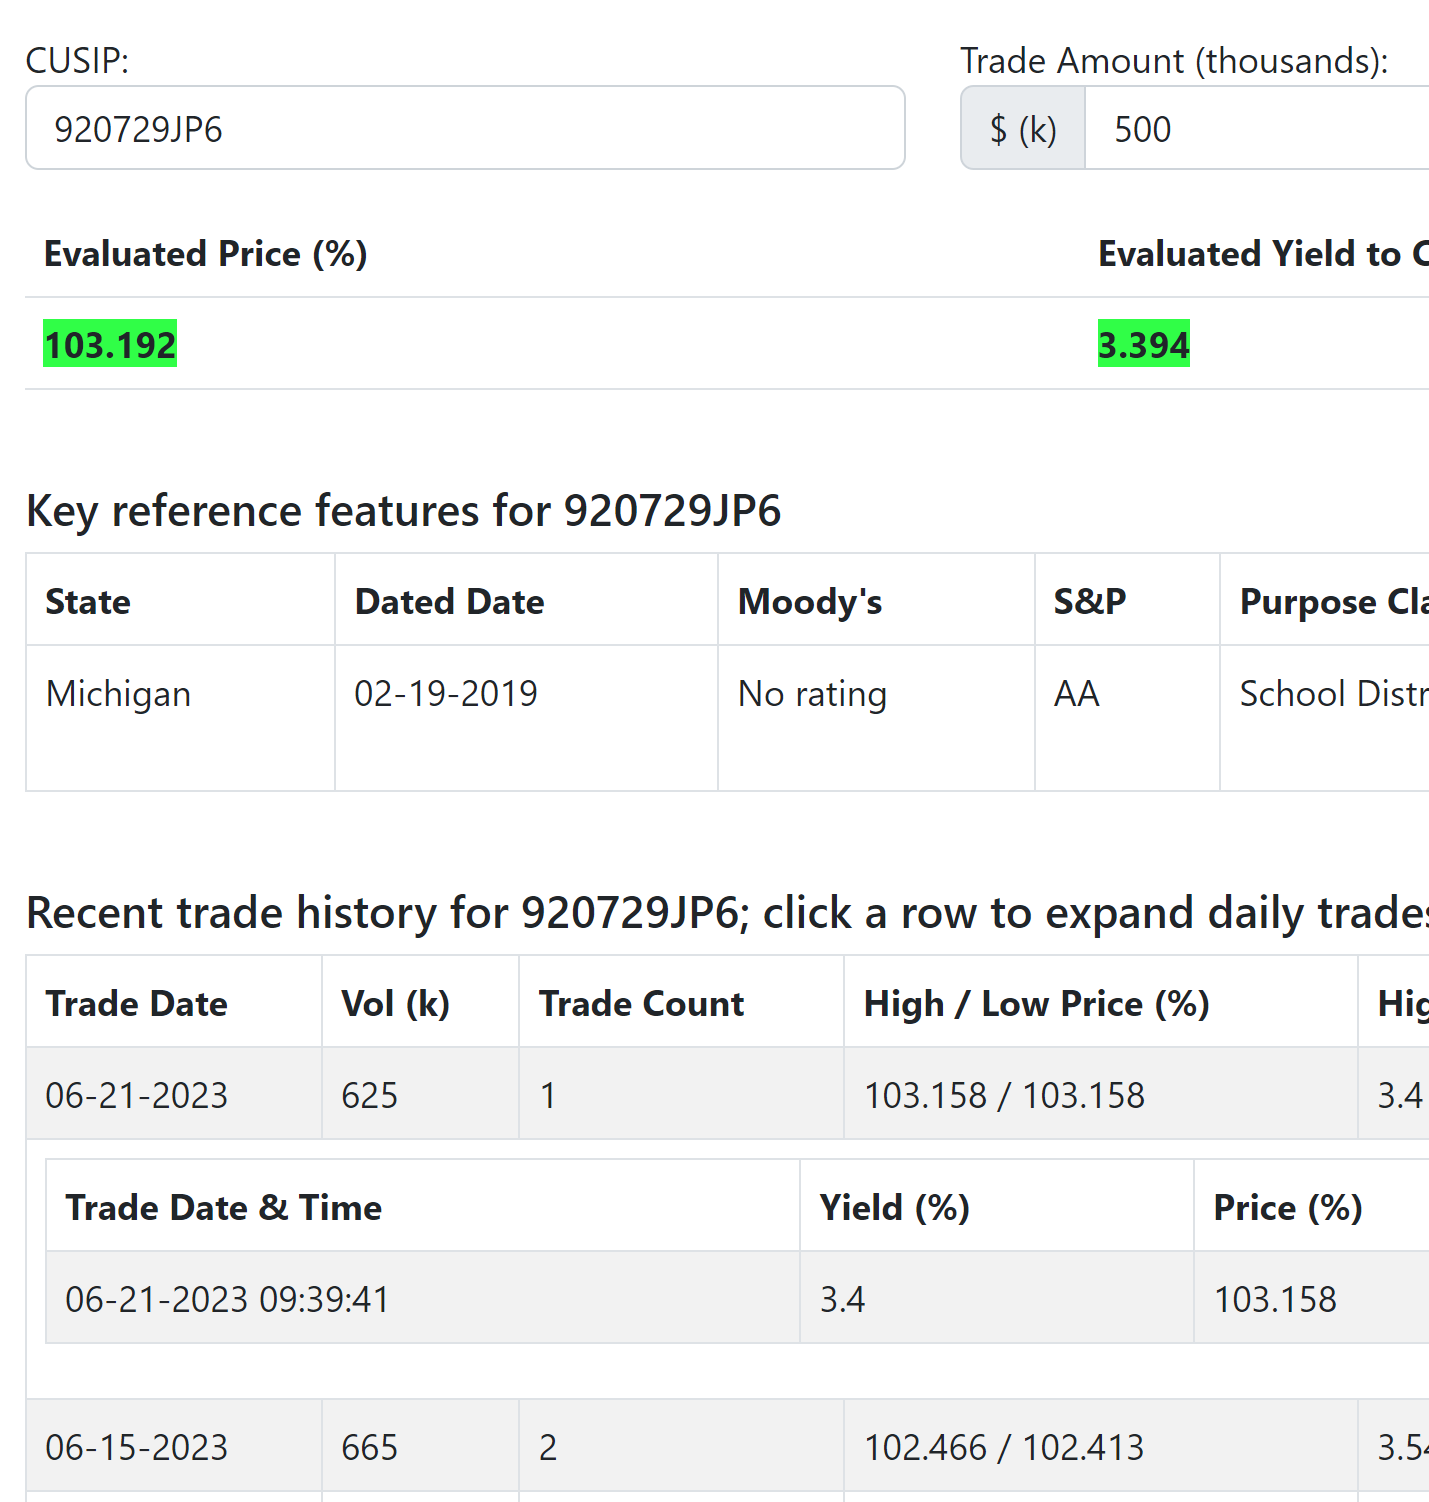

In [189]:
for trade in x.recent: 
    print(trade['trade_datetime'])

2023-06-21 09:39:41
2023-06-15 16:00:14
2023-06-15 14:49:07
2023-06-14 10:50:20
2023-06-14 10:48:23
2023-06-13 16:11:15
2022-08-02 14:26:51
2022-08-02 14:00:49
2022-08-02 12:35:49
2022-07-27 15:59:20
2022-02-17 16:47:17
2022-02-17 13:34:11
2021-07-09 10:48:25
2021-07-09 10:48:25
2021-06-11 12:20:18
2021-06-11 12:20:18
2019-01-29 11:30:56
2019-01-29 11:30:00


In [5]:
trades_df = pd.DataFrame(columns = trades_df_cols)
tz = pytz.timezone('US/Eastern')

file = "real_time_msrb_file_2023-06-22_16:15:02.json"
update_intraday_cusips(*get_trade_messages(os.path.join("msrb_intraday_real_time_trade_files",file), fs), trades_df)


Getting trade messages
Trade messages loaded
Processing 86 trade messages
Running update_intraday_cusips
Pricing trades 84 trades.
Pricing dealer sell, 55/84 trades
Error in _price_df. Exception: 400 {
    "error": "Failed to process element: 50 key: NON_CAT_AND_BINARY_FEATURES of 'instances' list. Error: INVALID_ARGUMENT: JSON Value: \"NaN\" Type: String is not of expected type: float"
}
Dealer sell trades priced
Pricing dealer dealer, 20/84 trades
Dealer dealer trades priced
Pricing dealer purchase, 9/84 trades
Dealer purchase trades priced
Trades priced.


In [39]:
trade_messages = get_trade_messages(os.path.join("msrb_intraday_real_time_trade_files",file), fs)
trade_cusips = [trade_messages[0][key]['cusip'] for key in trade_messages[0].keys() if trade_messages[0][key]['trade_type'] =='S' ]

Getting trade messages
Trade messages loaded
Processing 86 trade messages


In [64]:
for cusip in trade_cusips:
    try:
        price_cusips_list([cusip], np.repeat(5000, 1), 'D')
    except Exception as e: 
        print(cusip, e)

In [47]:
for cusip in trade_cusips:
    try:
        price_cusips_list([cusip], np.repeat(5000, 1), 'D')
    except Exception as e: 
        print(cusip, e)

64987JE80 400 {
    "error": "Failed to process element: 0 key: NON_CAT_AND_BINARY_FEATURES of 'instances' list. Error: INVALID_ARGUMENT: JSON Value: \"NaN\" Type: String is not of expected type: float"
}


In [58]:
x = pickle.loads(redis_client.get('64987JE80'))
x = x[x.isna()]

In [52]:
from modules.ficc.utils.auxiliary_variables import NON_CAT_FEATURES, BINARY

In [63]:
x[x.index.isin([NON_CAT_FEATURES + BINARY])]

Series([], Name: 414, dtype: object)